In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

In [2]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    - min_value (float)
    - max_value (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice


In [2]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    """
    return (e**(-x**2))

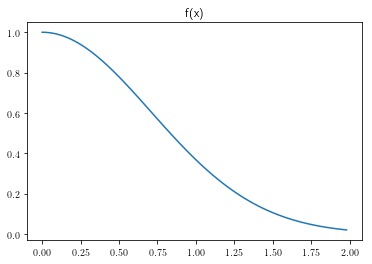

In [3]:
xs = [float(i/50) for i in range(int(50*2))]
ys = [f_of_x(x) for x in xs]
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.plot(xs,ys)
plt.title("f(x)")
plt.show()

In [4]:
def g_of_x(x):
    """
    This is the weight function we want to integrate over.
    """
    return (e**(-x))

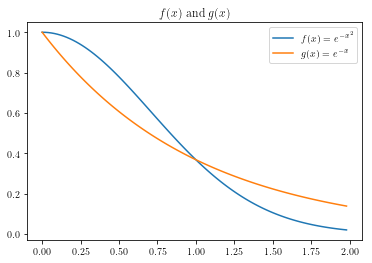

In [49]:
ys1 = [g_of_x(x) for x in xs]
plt.plot(xs,ys,label=r"$f(x) = e^{-x^2}$")
plt.plot(xs,ys1,label = r"$g(x) = e^{-x}$")
plt.title("$f(x)$ and $g(x)$")
plt.legend()

In [4]:
def simple_monte_carlo(num_samples=5000):
    """
    This function performs simple monte carlo method
    """
    lower_bound = 0
    upper_bound = 2
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)


In [5]:
simple_monte_carlo()

0.9096634538641163

In [6]:
def get_simple_MC_variance(num_samples = 5000):
    """
    This function returns the variance fo the simple Monte Carlo.
    
    """
    int_max = 2 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave


In [7]:
get_simple_MC_variance()

0.6324929601734413

In [65]:
def IS_monte_carlo(num_samples=5000):
    """
    This function returns the Importance sampling Monte Carlo.
    
    """
    lower_bound = 0
    upper_bound = 2
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)/g_of_x(x)
    
    return  float(sum_of_samples/num_samples)


In [83]:
def get_IS_MC_variance(num_samples = 5000):

   
    """
    This function calculates the variance of a IS Monte Carlo
    
    
    """
    int_max = 2
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave


In [66]:
IS_monte_carlo()

0.8510059580193349

In [18]:
get_IC_MC_variance()

0.1356367988341266

In [23]:
import timeit

start = timeit.default_timer()

print("IS estimate is = "+str(IS_monte_carlo(200)))

stop = timeit.default_timer()

print('Time: ', stop - start)  


IS estimate is = 1.6870435310775982
Time:  0.0014409000004889094


Text(0, 0.5, 'Integrateion Estimate')

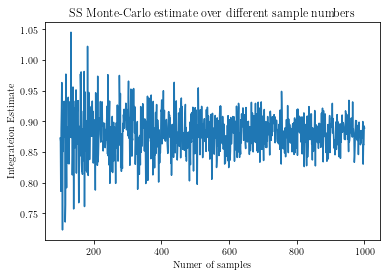

In [107]:
sample_numbers = np.linspace(1,1000,num = 1000)

SS_estimate = []
SS_error = []
IS_estimate = []
IS_error = []


for sample in sample_numbers:
    sample = int(sample)
    start = timeit.default_timer()
    SS = simple_monte_carlo(sample)
    stop = timeit.default_timer()
#    print('Estimate of sample'+str(sample) , SS)
#    print('Time: sample '+str(sample), stop - start)  
    SS_estimate.append(SS)
    SSerr = get_simple_MC_variance(sample)/math.sqrt(sample)
#    print(SSerr)
    SS_error.append(SSerr)
    
plt.plot(sample_numbers[100:],SS_estimate[100:])
plt.title("SS Monte-Carlo estimate over different sample numbers" )
plt.xlabel("Numer of samples")
plt.ylabel("Integrateion Estimate")

Text(0, 0.5, 'SS errors')

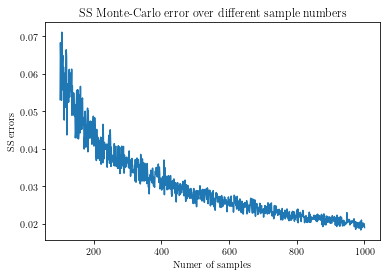

In [106]:
plt.plot(sample_numbers[100:],SS_error[100:])
plt.title("SS Monte-Carlo error over different sample numbers" )
plt.xlabel("Numer of samples")
plt.ylabel("SS errors")

In [110]:
for sample in sample_numbers:
    sample = int(sample)
    start = timeit.default_timer()
    IS = IS_monte_carlo(sample)
    stop = timeit.default_timer()
    print('Estimate of sample'+str(sample) , IS)
    print('Time: sample '+str(sample), stop - start)  
    IS_estimate.append(IS)
    ISerr = get_IS_MC_variance(sample)/math.sqrt(sample)
    print(ISerr)
    IS_error.append(ISerr)

Estimate of sample1 0.3776780721149062
Time: sample 1 3.589999869291205e-05
-0.35519898540948414
Estimate of sample2 1.1752915924419243
Time: sample 2 3.440000000409782e-05
0.17415781923938645
Estimate of sample3 0.9626310483133692
Time: sample 3 1.650000012887176e-05
-0.2131296547144269
Estimate of sample4 0.9775655524686111
Time: sample 4 3.3399999665562063e-05
-0.24885721250221832
Estimate of sample5 0.6253132729065498
Time: sample 5 2.2700000045006163e-05
-0.09640873747852577
Estimate of sample6 0.693886287036797
Time: sample 6 2.769999991869554e-05
-0.1082645761176899
Estimate of sample7 0.8578970690458229
Time: sample 7 5.6400000175926834e-05
-0.021745417056736865
Estimate of sample8 0.7035807155119552
Time: sample 8 2.2700000045006163e-05
0.044752189814308826
Estimate of sample9 0.7338246132634153
Time: sample 9 2.990000029967632e-05
-0.07380316490472046
Estimate of sample10 0.7256024404401344
Time: sample 10 3.440000000409782e-05
-0.019629059575197685
Estimate of sample11 0.874

Estimate of sample194 0.8306497476266957
Time: sample 194 0.00033629999961704016
0.003936674904917354
Estimate of sample195 0.8319193117312018
Time: sample 195 0.0003417000007175375
0.004189972185928577
Estimate of sample196 0.8350116263809708
Time: sample 196 0.0003409999990253709
0.005003015745217118
Estimate of sample197 0.8691275327652278
Time: sample 197 0.0003505000004224712
0.008848619049635185
Estimate of sample198 0.8346208327738733
Time: sample 198 0.0003525000010995427
0.014990317408909538
Estimate of sample199 0.8545534494638888
Time: sample 199 0.0003541999994922662
0.010619718835028493
Estimate of sample200 0.8480166236062878
Time: sample 200 0.00034420000156387687
-0.0013384257057359908
Estimate of sample201 0.8171514203973447
Time: sample 201 0.00035570000000006985
0.015879102427210308
Estimate of sample202 0.8322828301384319
Time: sample 202 0.000356399999873247
0.008951102217947355
Estimate of sample203 0.8536798194777453
Time: sample 203 0.00040050000097835436
0.0130

Estimate of sample347 0.8744416149610976
Time: sample 347 0.0008049999996728729
0.00798919548542198
Estimate of sample348 0.8364910865176569
Time: sample 348 0.0007332000004680594
0.010252200882055073
Estimate of sample349 0.8323907383666321
Time: sample 349 0.0007100000002537854
0.011720841292183542
Estimate of sample350 0.8641661695552516
Time: sample 350 0.0005992999995214632
0.010119695428020076
Estimate of sample351 0.8854948707826178
Time: sample 351 0.000647900000330992
0.005248680913570614
Estimate of sample352 0.8597419642682058
Time: sample 352 0.0005678999987139832
0.007700524703069692
Estimate of sample353 0.8513378400945452
Time: sample 353 0.0006100999999034684
0.0082819881316181
Estimate of sample354 0.8453168094190038
Time: sample 354 0.0015782999998918967
0.01145151045868717
Estimate of sample355 0.8378925854407575
Time: sample 355 0.000684299999193172
0.0033237448088899555
Estimate of sample356 0.8381993448832269
Time: sample 356 0.0006011000004946254
0.00654160669098

Time: sample 429 0.000850200000058976
0.008334332565640637
Estimate of sample430 0.847350571453532
Time: sample 430 0.0006840000005468028
0.012409548972710493
Estimate of sample431 0.8481088024141258
Time: sample 431 0.0006639000002905959
0.0037703505983184733
Estimate of sample432 0.8615430757086202
Time: sample 432 0.0006898000010551186
0.003004009824790886
Estimate of sample433 0.851886483061501
Time: sample 433 0.0008068999995884951
0.006575426348098665
Estimate of sample434 0.8545594176792524
Time: sample 434 0.0007500000010622898
0.007870197216173668
Estimate of sample435 0.8174374007398006
Time: sample 435 0.0007506000001740176
0.007848298025858055
Estimate of sample436 0.8471856232412447
Time: sample 436 0.0007779999996273546
0.0030811156678121785
Estimate of sample437 0.8264913227707342
Time: sample 437 0.0008232000000134576
0.008294414637114944
Estimate of sample438 0.8616316311545871
Time: sample 438 0.000756800000090152
0.008293984179690045
Estimate of sample439 0.835962578

0.005826122447929249
Estimate of sample532 0.8348751352066797
Time: sample 532 0.0011722999988705851
0.008998926913173352
Estimate of sample533 0.8666101076882243
Time: sample 533 0.0018108999993273756
0.006656772034201553
Estimate of sample534 0.8130630627761609
Time: sample 534 0.0021171000007598195
0.006804549055718107
Estimate of sample535 0.8515992506539816
Time: sample 535 0.0035492000006343005
0.007063676816117077
Estimate of sample536 0.8665678783574738
Time: sample 536 0.004464199999347329
0.004507696823765124
Estimate of sample537 0.8306195831817088
Time: sample 537 0.0008526000001438661
0.006571187852457897
Estimate of sample538 0.8219266938638892
Time: sample 538 0.0015155000000959262
0.005771950493746803
Estimate of sample539 0.8619200004926123
Time: sample 539 0.0012150999991717981
0.004551665193662501
Estimate of sample540 0.8466273206272605
Time: sample 540 0.0010540000002947636
0.008222223419520685
Estimate of sample541 0.8408133307133607
Time: sample 541 0.00854240000

0.007381968777652639
Estimate of sample637 0.8414011457905151
Time: sample 637 0.001280300000871648
0.003942662879662767
Estimate of sample638 0.8105358028139505
Time: sample 638 0.002771200001006946
0.006061362526959329
Estimate of sample639 0.867350391546865
Time: sample 639 0.0024379999995289836
0.006457990286168661
Estimate of sample640 0.8471189992729103
Time: sample 640 0.002028900000368594
0.004820283911918629
Estimate of sample641 0.8851339140960572
Time: sample 641 0.002126599998518941
0.004872167184563234
Estimate of sample642 0.879015461326446
Time: sample 642 0.001580899999680696
0.0053732850201814175
Estimate of sample643 0.8520550497321032
Time: sample 643 0.0019941999998991378
0.006257671312150245
Estimate of sample644 0.8686649639704079
Time: sample 644 0.001019000001178938
0.006238458367550418
Estimate of sample645 0.8458546344478236
Time: sample 645 0.0010566999990260229
0.007558449862698077
Estimate of sample646 0.854773160341937
Time: sample 646 0.001978399999643443

0.006327477718819932
Estimate of sample727 0.8640885490686256
Time: sample 727 0.002328600001419545
0.005973951635081697
Estimate of sample728 0.833169735927006
Time: sample 728 0.001109199998609256
0.006861577044201768
Estimate of sample729 0.8492191434514803
Time: sample 729 0.0011692000007315073
0.004193341534129116
Estimate of sample730 0.8338832101860001
Time: sample 730 0.0011336000006849645
0.005645263494471661
Estimate of sample731 0.8507145861877151
Time: sample 731 0.001186900000902824
0.004120402355849884
Estimate of sample732 0.8340891463596318
Time: sample 732 0.0012153999996371567
0.00463719480136749
Estimate of sample733 0.8283784503300554
Time: sample 733 0.0016030000006139744
0.0047862817347735145
Estimate of sample734 0.818800107804157
Time: sample 734 0.002823299999363371
0.0060126932626133585
Estimate of sample735 0.8474658834099276
Time: sample 735 0.002833900000041467
0.0030937957187031177
Estimate of sample736 0.8540252226922039
Time: sample 736 0.006259699999645

0.005426967244033178
Estimate of sample837 0.8336921953106927
Time: sample 837 0.0011827000016637612
0.0048745802919241375
Estimate of sample838 0.8489018677959949
Time: sample 838 0.0029447999986587092
0.0062202185835698014
Estimate of sample839 0.8514409697130597
Time: sample 839 0.0013149000005796552
0.004533813006779811
Estimate of sample840 0.8340951694147105
Time: sample 840 0.0012773999987985007
0.0052228990130576865
Estimate of sample841 0.8454240758702637
Time: sample 841 0.0016107999999803724
0.005662704573962945
Estimate of sample842 0.8613889608448394
Time: sample 842 0.0015960000000632135
0.003988603188508792
Estimate of sample843 0.845431342548967
Time: sample 843 0.002083699999275268
0.00691476444442549
Estimate of sample844 0.8537876027281041
Time: sample 844 0.001581399999849964
0.003922884389436618
Estimate of sample845 0.8682920048673336
Time: sample 845 0.0014924999995855615
0.004677536243348761
Estimate of sample846 0.8489631933747814
Time: sample 846 0.00259189999

Time: sample 938 0.0016596000004938105
0.0037982032772216163
Estimate of sample939 0.82472575844996
Time: sample 939 0.0017126999991887715
0.005261950962803409
Estimate of sample940 0.8426325944683587
Time: sample 940 0.0017865000008896459
0.006039937338720559
Estimate of sample941 0.8516147130690078
Time: sample 941 0.00174209999931918
0.004396570932645184
Estimate of sample942 0.8564151232864395
Time: sample 942 0.0017008999984682305
0.003453032206757292
Estimate of sample943 0.8209818921747167
Time: sample 943 0.002336499999728403
0.004016850407991127
Estimate of sample944 0.8419930068954314
Time: sample 944 0.0015406999991682824
0.0041814911345216
Estimate of sample945 0.8619244560760463
Time: sample 945 0.0018242000005557202
0.00579046349149929
Estimate of sample946 0.84874174057936
Time: sample 946 0.0016697999999450985
0.0053405723313428525
Estimate of sample947 0.8263014898446115
Time: sample 947 0.0024582999994890997
0.0056078182857933
Estimate of sample948 0.8456944205154828


Text(0, 0.5, 'Integrateion Estimate')

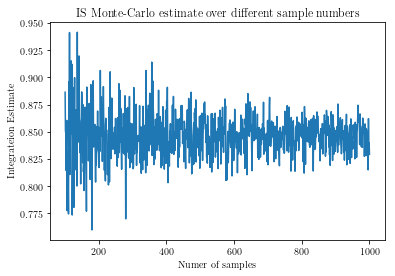

In [111]:
plt.plot(sample_numbers[100:],IS_estimate[100:])
plt.title("IS Monte-Carlo estimate over different sample numbers" )
plt.xlabel("Numer of samples")
plt.ylabel("Integrateion Estimate")

Text(0, 0.5, 'IS errors')

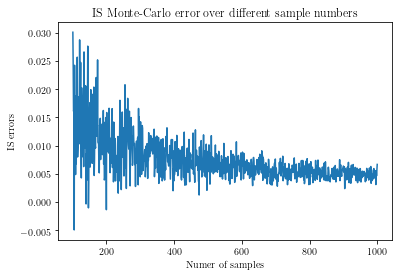

In [112]:
plt.plot(sample_numbers[100:],IS_error[100:])
plt.title("IS Monte-Carlo error over different sample numbers" )
plt.xlabel("Numer of samples")
plt.ylabel("IS errors")

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [6]:
0.8820813907624217 - 0.8420844265958165

0.03999696416660514

In [14]:
0.8820813907624217 - 0.899857042310132 

-0.017775651547710325

In [15]:
0.8820813907624217 - 0.8395522730031837

0.042529117759237955

In [16]:
0.8820813907624217 - 0.8884724129381802

-0.006391022175758598

In [17]:
0.8820813907624217 -0.840056437304866

0.042024953457555636

In [18]:
0.8820813907624217 - 0.8742176629014586

0.00786372786096301

In [19]:
0.8820813907624217 -  0.8650444904070446

0.017036900355377083

In [20]:
0.8820813907624217 - 0.819525792161192

0.06255559860122961